# Clasificar el cancer de cervix

Las redes neuronales artificiales (también conocidas como sistemas conexionistas) son un modelo computacional vagamente inspirado en el comportamiento observado en su homólogo biológico1.
Consiste en un conjunto de unidades, llamadas neuronas artificiales, conectadas entre sí para transmitirse señales. La información de entrada atraviesa la red neuronal (donde se somete a diversas operaciones) produciendo unos valores de salida.

- Red Neuronal

### Autores
   * Efrén Jiménez

## Análisis del Problema

Cada año se diagnostican alrededor de 11,000 nuevos casos de cáncer de cuello uterino invasivo en los EE. UU. Sin embargo, la cantidad de nuevos casos de cáncer de cuello uterino ha disminuido de manera constante durante las últimas décadas. Aunque es el tipo de cáncer más prevenible, cada año el cáncer de cuello uterino mata a unas 4.000 mujeres en los EE. UU. Y a unas 300.000 en todo el mundo. En los Estados Unidos, las tasas de mortalidad por cáncer de cuello uterino se redujeron en un 74% entre 1955 y 1992 gracias al aumento de las pruebas de detección y la detección temprana con la prueba de Papanicolaou. EDAD El cincuenta por ciento de los diagnósticos de cáncer de cuello uterino ocurren en mujeres de 35 a 54 años, y aproximadamente el 20% ocurre en mujeres mayores de 65 años. La edad media de diagnóstico es de 48 años. Aproximadamente el 15% de las mujeres desarrollan cáncer de cuello uterino entre los 20 y los 30 años. El cáncer de cuello uterino es extremadamente raro en mujeres menores de 20 años. Sin embargo, muchas mujeres jóvenes se infectan con múltiples tipos de virus del papiloma humano, que luego pueden aumentar su riesgo de contraer cáncer de cuello uterino en el futuro.

![blackbell](https://storage.googleapis.com/kaggle-datasets-images/2013/3443/e615ebc200d4a49470d46fc3ca934e54/dataset-cover.jpg)

### Librerías

In [189]:
!pip install numpy
!pip install pandas

In [7]:
import warnings
warnings.filterwarnings('ignore')
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

#estimators
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import missingno as msno 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Entendimiento de los Datos

El total es de 858 registro con 36 columnas dentro del set de datos de entrenamiento

'Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'

In [37]:
#Cargar los datos
kag_risk_factors_cervical_cancer = pd.read_csv(r"data/kag_risk_factors_cervical_cancer.csv",na_values='?')

In [38]:
kag_risk_factors_cervical_cancer.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [39]:
kag_risk_factors_cervical_cancer=kag_risk_factors_cervical_cancer.drop(
    columns=["STDs: Time since first diagnosis","STDs: Number of diagnosis",'STDs: Time since last diagnosis']) 

In [40]:
#Primeros registros
kag_risk_factors_cervical_cancer.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [41]:
#Describir dataset
kag_risk_factors_cervical_cancer.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,753.000000,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.001328,0.002656,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,0.036442,0.051503,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#Información del dataset
kag_risk_factors_cervical_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [42]:
# Numero de registros del dataset
print("Cantidad de registros:",len(kag_risk_factors_cervical_cancer))
# Cantidad de columnas del dataset
print("Cantidad de columnas:",len(kag_risk_factors_cervical_cancer.columns))
# Tipos de datos del dataset
print("Tipo de datos:",kag_risk_factors_cervical_cancer.dtypes.unique())
# Tamaño del daset
print("Filas y columnas:",kag_risk_factors_cervical_cancer.shape)

Cantidad de registros: 858
Cantidad de columnas: 33
Tipo de datos: [dtype('int64') dtype('float64')]
Filas y columnas: (858, 33)


In [43]:
# Chekear valores nulos
print(kag_risk_factors_cervical_cancer.isnull().any().sum(), ' / ', len(kag_risk_factors_cervical_cancer.columns))

24  /  33


In [44]:
#Cuales columnnas estas con valores nulos
kag_risk_factors_cervical_cancer.isnull().sum()[kag_risk_factors_cervical_cancer.isnull().sum() > 0]

Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                          

In [45]:
# N/A= Valores vacios 
#Usar solo si se quiere eliminar los registros que contienen columnas vacías
kag_risk_factors_cervical_cancer=kag_risk_factors_cervical_cancer.dropna() 

In [51]:
kag_risk_factors_cervical_cancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [52]:
kag_risk_factors_cervical_cancer["Dx:Cancer"].unique()

array([0, 1], dtype=int64)

In [53]:
kag_risk_factors_cervical_cancer['Dx:Cancer'].value_counts(normalize=True)

0    0.974551
1    0.025449
Name: Dx:Cancer, dtype: float64

<AxesSubplot:xlabel='Dx:Cancer', ylabel='count'>

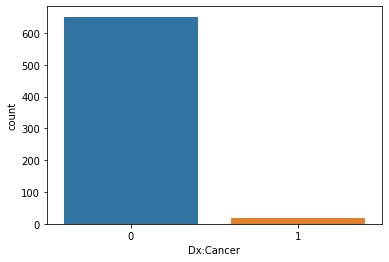

In [54]:
sns.countplot(kag_risk_factors_cervical_cancer['Dx:Cancer'])

## Exploración de los Datos

#### Gráficos exploratorios

NameError: name 'income_evaluation' is not defined

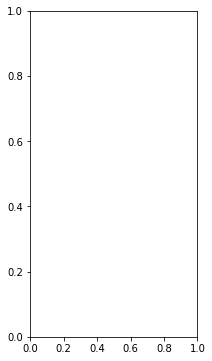

In [50]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in [' capital-gain' , ' education-num' , ' fnlwgt']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =1 , wspace = 1)
    sns.distplot(income_evaluation[x] , bins = 20)
    plt.title('Distribucion de {}'.format(x))
plt.show()

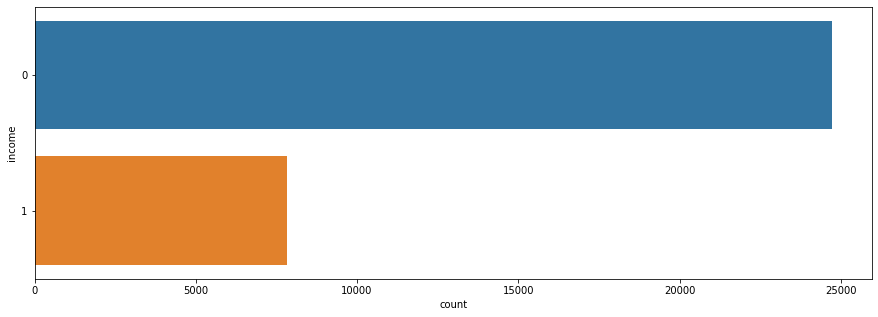

In [208]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'income' , data = income_evaluation)
plt.show()

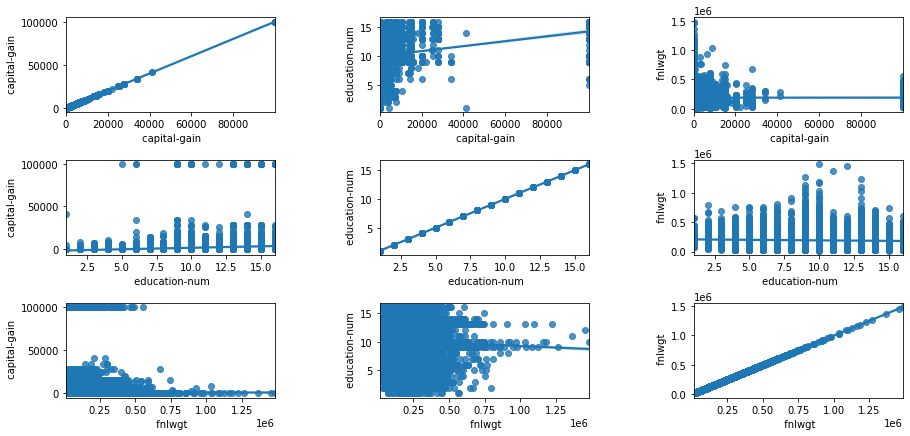

In [209]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in [' capital-gain' , ' education-num' , ' fnlwgt']:
    for y in [' capital-gain' , ' education-num' , ' fnlwgt']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = income_evaluation)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [210]:
income_evaluation[" hours-per-week"].tail(17).value_counts().index


Int64Index([40, 20, 30, 60, 50, 45, 11, 38], dtype='int64')

Text(0.5, 1.0, 'Distribucion de las horas trabajadas')

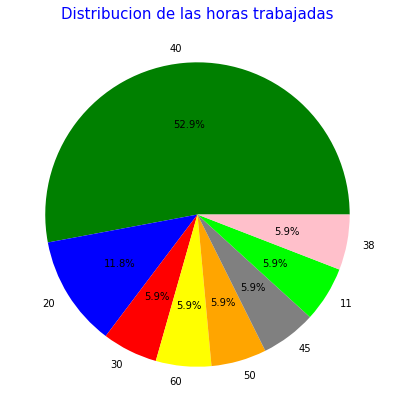

In [211]:
labels = income_evaluation[" hours-per-week"].tail(17).value_counts().index
colors = ['green','blue','red','yellow','orange','gray','lime','pink']
explode = [0,0,0,0,0,0,0,0,]
sizes = income_evaluation[" hours-per-week"].tail(17).value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribucion de las horas trabajadas',color = 'blue',fontsize = 15)

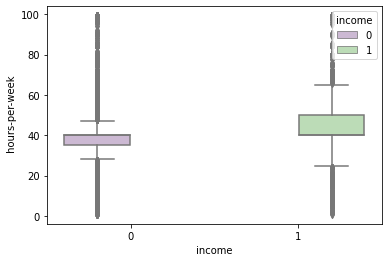

In [212]:
sns.boxplot(x="income", y=" hours-per-week", hue="income", data=income_evaluation, palette="PRGn")
plt.show()

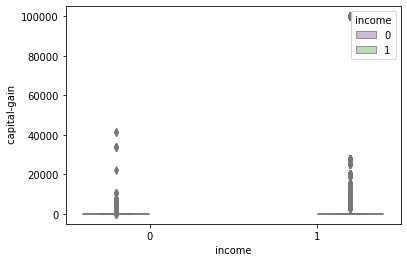

In [213]:
sns.boxplot(x="income", y=" capital-gain", hue="income", data=income_evaluation, palette="PRGn")
plt.show()

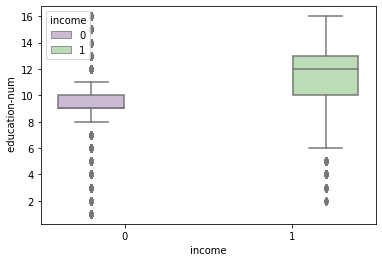

In [214]:
sns.boxplot(x="income", y=" education-num", hue="income", data=income_evaluation, palette="PRGn")
plt.show()

Dividir el conjunto de datos en uno de entrenamiento y otro de pruebas:

In [215]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(income_evaluation[['age', 'workclass', ' fnlwgt', 'education', ' education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', 'native-country']],income_evaluation[["income"]], test_size=0.3, random_state=1234)

>Es importante siempre validar los rangos de los conjuntos de datos creados, para evitar caer en extrapolación:

In [216]:
print("Entrenamiento dimensiones",X_train.shape)
print("Descripción")
X_train.describe

Entrenamiento dimensiones (22792, 14)
Descripción


<bound method NDFrame.describe of        age  workclass   fnlwgt  education   education-num  marital-status  \
29700   37          4    34146         11               9               2   
1529    37          4    26898         11               9               0   
27477   26          4   190762         15              10               2   
31950   35          4   189092          9              13               2   
4732    23          4   260019          5               4               4   
...    ...        ...      ...        ...             ...             ...   
27852   24          4   223367          1               7               4   
23605   20          4   127185         15              10               4   
1318    41          7   144928          9              13               2   
25299   40          4   199303         11               9               2   
27439   38          4    38312          9              13               2   

       occupation  relationship  race  se

In [217]:
print("Pruebas dimensiones",X_test.shape)
print("Descripción")
X_test.describe

Pruebas dimensiones (9769, 14)
Descripción


<bound method NDFrame.describe of        age  workclass   fnlwgt  education   education-num  marital-status  \
1055    32          4    87643          9              13               2   
26305   27          4   207352          9              13               2   
9568    73          7    74040          5               4               0   
15071   39          4   174924         11               9               5   
2012    31          4   264936         15              10               4   
...    ...        ...      ...        ...             ...             ...   
19433   59          0   367984          9              13               2   
12825   26          4   144483          8              11               0   
23420   55          4    98361          9              13               2   
6259    24          2   150084         15              10               5   
1439    47          4    67716         11               9               2   

       occupation  relationship  race  se

## Modelo de Machine Learning

Una vez seleccionadas las variables para incluir en el modelo de regresión, se procede a crearlo:

In [218]:
#-------------- 
# ANN 
#--------------
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation='tanh', max_iter=10000, hidden_layer_sizes=(4,2))

In [219]:
# Entrenamos nuestro modelo
classifier4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [220]:
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred1 = classifier4.predict( X_test )

In [221]:
y_pred1

array([0, 0, 0, ..., 1, 0, 0])

In [222]:
predict_values=classifier4.predict_proba(X_test)
predict_values[:, 1]

array([0. , 0. , 0.5, ..., 1. , 0. , 0. ])

In [223]:
## Evaluación

In [224]:
np.array(y_pred1)

array([0, 0, 0, ..., 1, 0, 0])

In [225]:
matrix=confusion_matrix(np.array(y_test), np.array(y_pred1))
matrix

array([[7051,  418],
       [1664,  636]], dtype=int64)

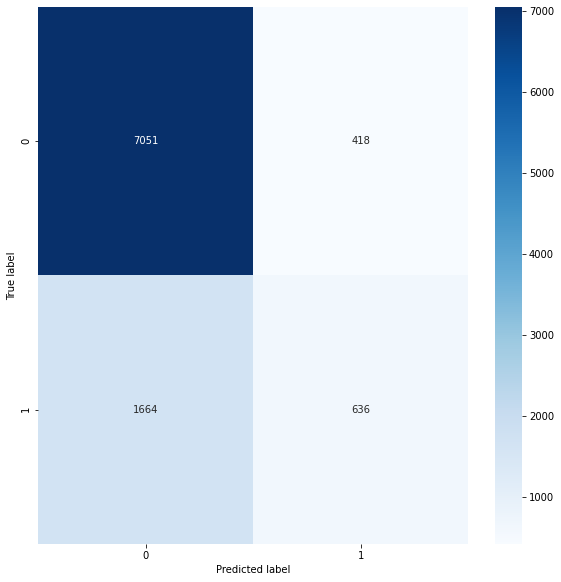

In [226]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(matrix, annot=True,fmt='g', cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [227]:
scoresSVC = cross_val_score( classifier4, X_test, y_test, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on model Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))

scoresSVC = cross_val_score( classifier4, X_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))
classifier4.score(X_train, y_train)

Mean kernel-SVM CrossVal Accuracy on model Set 0.79, with std=0.01
Mean kernel-SVM CrossVal Accuracy on Train Set 0.78, with std=0.01


0.8672341172341173

In [228]:
auc = roc_auc_score(y_test, predict_values[:, 1])
print('AUC: %.2f' % auc)

AUC: 0.66


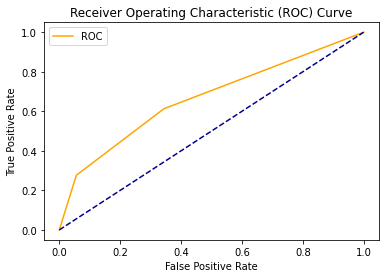

In [229]:
fpr, tpr, thresholds = roc_curve(y_test, predict_values[:, 1])
plt.plot(fpr, tpr, color='orange', label='ROC')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [230]:
(matrix[[0]][0][0] + matrix[[1]][0][1])/X_test.shape[0]

0.786876855358788

\begin{equation}Exactitud=\frac{VP+VN}{Total}\end{equation}

In [231]:
(matrix[[0]][0][0])/X_test.shape[0]

0.7217729552666599

\begin{equation}\text{Sensibilidad}=\frac{VP}{\text{Total Positivos}}\end{equation}

In [232]:
(matrix[[0]][0][0])/(matrix[[0]][0][0] + matrix[[1]][0][0])

0.8090648307515778

\begin{equation}\text{Precisión}=\frac{VP}{\text{Total clasificados positivos}}\end{equation}

In [233]:
(matrix[[1]][0][1])/(matrix[[0]][0][1] + matrix[[1]][0][1])

0.603415559772296

\begin{equation}\text{Especificidad}=\frac{VN}{\text{Total Negativos}}\end{equation}

## Resultados
En conclusión, los valores obtenidos por la clasifición verdaderos positivos no son buenos. Por lo cual no se recomienda utilizar este modelo de machine learning.